In [1]:
# ===============================
# 1. IMPORT LIBRARIES
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

from xgboost import XGBRegressor

# ===============================
# 2. LOAD DATASET
# ===============================
df = pd.read_csv("/content/StudentsPerformance.csv")

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
# Basic info
df.info()

# Statistical summary
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


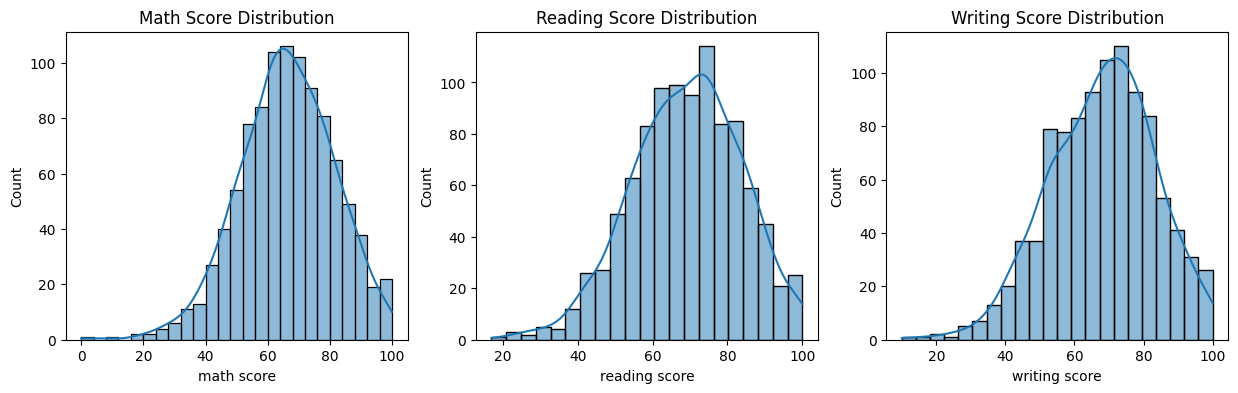

In [3]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.histplot(df['math score'], kde=True)
plt.title("Math Score Distribution")

plt.subplot(1,3,2)
sns.histplot(df['reading score'], kde=True)
plt.title("Reading Score Distribution")

plt.subplot(1,3,3)
sns.histplot(df['writing score'], kde=True)
plt.title("Writing Score Distribution")

plt.show()


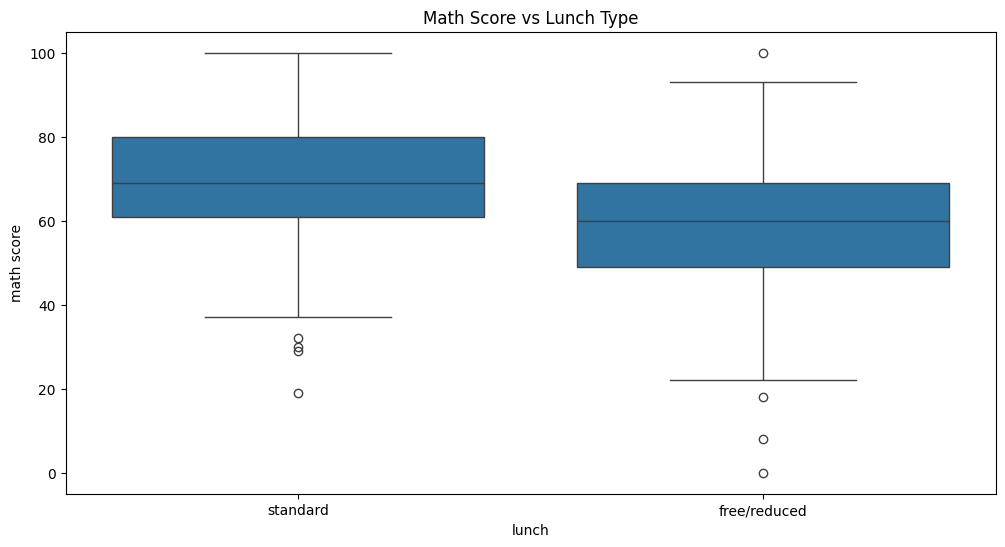

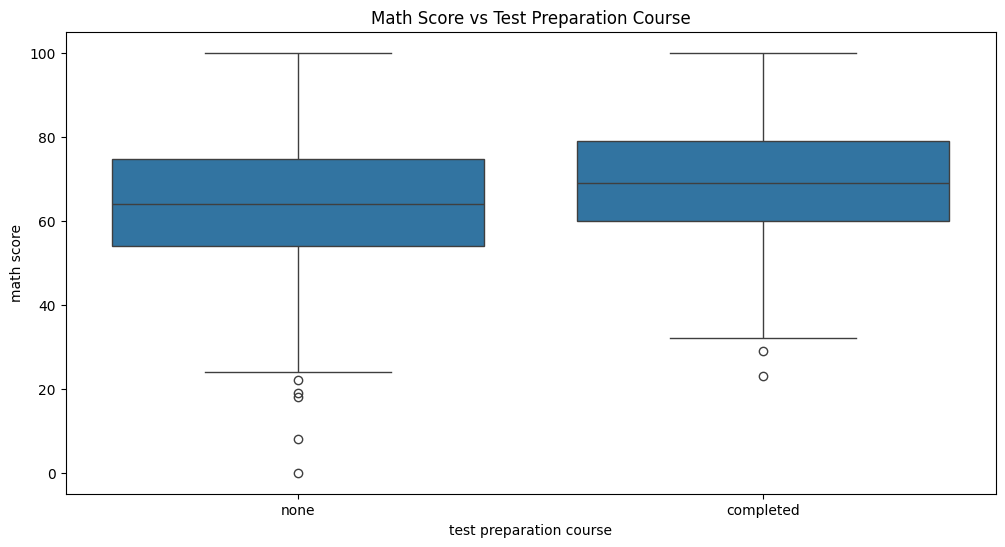

In [4]:
plt.figure(figsize=(12,6))
sns.boxplot(x='lunch', y='math score', data=df)
plt.title("Math Score vs Lunch Type")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='test preparation course', y='math score', data=df)
plt.title("Math Score vs Test Preparation Course")
plt.show()


In [5]:
X = df.drop(columns=['math score'])
y = df['math score']

categorical_features = X.select_dtypes(include=['object']).columns


In [6]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


In [7]:
model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)


In [8]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object'))])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [10]:
y_pred = pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score (Regression Accuracy):", r2)


RMSE: 15.407415195066434
R² Score (Regression Accuracy): 0.024451375007629395


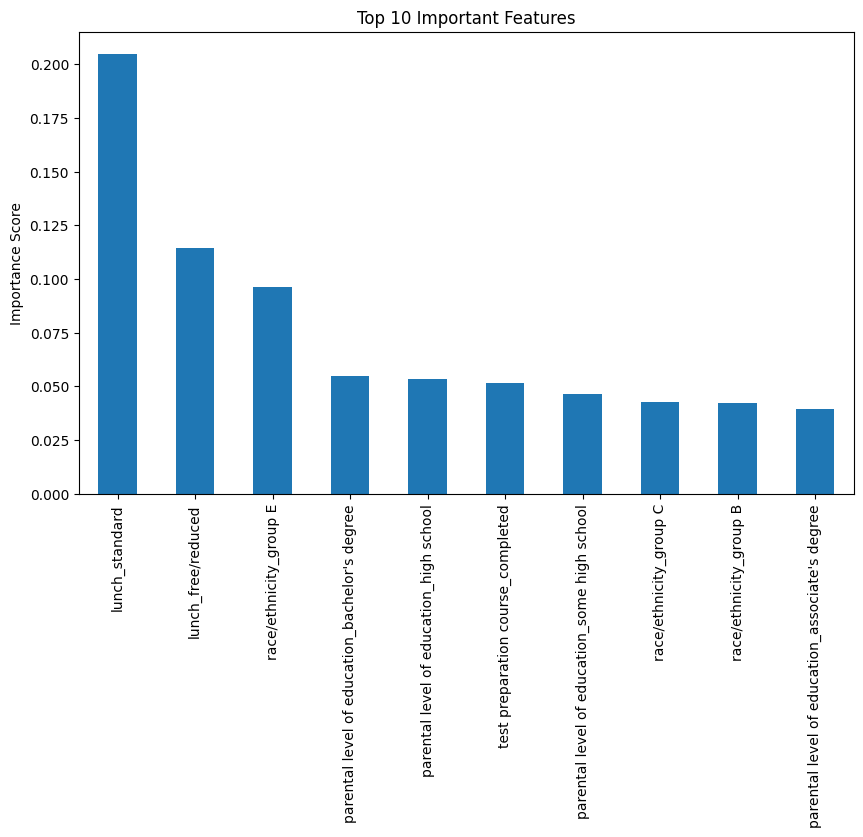

In [11]:
# Get feature names after encoding
feature_names = pipeline.named_steps['preprocessor'] \
    .named_transformers_['cat'] \
    .get_feature_names_out(categorical_features)

importances = pipeline.named_steps['model'].feature_importances_

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_imp.head(10).plot(kind='bar')
plt.title("Top 10 Important Features")
plt.ylabel("Importance Score")
plt.show()


In [12]:
print("\nEnter student details for math score prediction:\n")

gender = input("Gender (male/female): ")
race = input("Race/Ethnicity (group A/B/C/D/E): ")
parent_edu = input("Parental level of education: ")
lunch = input("Lunch (standard/free/reduced): ")
prep = input("Test preparation course (none/completed): ")

# Create DataFrame
user_input = pd.DataFrame({
    'gender': [gender],
    'race/ethnicity': [race],
    'parental level of education': [parent_edu],
    'lunch': [lunch],
    'test preparation course': [prep]
})

# Prediction
predicted_score = pipeline.predict(user_input)

print("\nPredicted Math Score:", round(predicted_score[0], 2))



Enter student details for math score prediction:

Gender (male/female): male
Race/Ethnicity (group A/B/C/D/E): a
Parental level of education: some degree
Lunch (standard/free/reduced): free
Test preparation course (none/completed): none

Predicted Math Score: 65.68
